C:\Anaconda\lib\site-packages\ipykernel_launcher.py:77: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


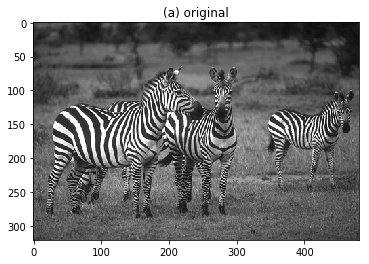

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:84: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


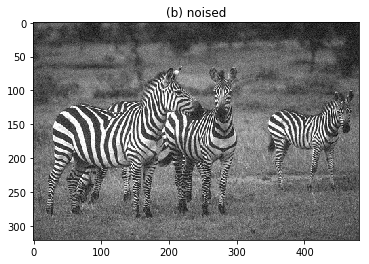

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:89: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


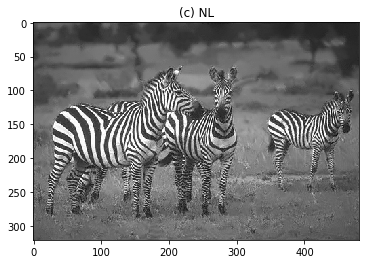

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:94: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


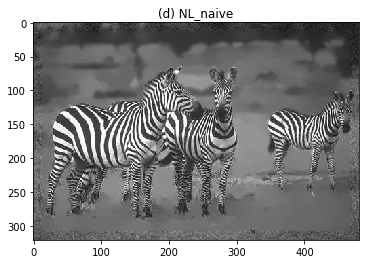

In [51]:
import numpy as np
from scipy.misc import imread, imsave
import matplotlib.pyplot as plt
import math

#question(1),(2)
def imnlmeans_naive(img, sigma, s1, s2, p1,p2, h):
    n1,n2=img.shape
    p=(2*p1+1)*(2*p2+1)
    for i in range (p1+s1,n1-s1-p1):
        for j in range (p2+s2,n2-s2-p2):
            z=0
            sum=0
            for k in range (-s1,s1+1):
                for l in range (-s2,s2+1):
                    alpha=0
                    for u in range (-p1,p1+1):
                        for v in range (-p2,p2+1):
                            temp=(img[i+k+u,j+l+v]-img[i+u,j+v])**2
                            alpha=alpha+temp
                    phi=math.exp(max(alpha/p-2*sigma**2,0)/((-16*h*sigma**2)/p))
                    z=z+phi
                    sum=sum+phi*img[i+k,j+l]
            img[i,j]=sum/z
    return img

def  noise(img, sigma0):
    n1,n2=img.shape
    img_test=img+sigma0*np.random.randn(n1,n2)
    for i in range (n1):
        for j in range (n2):
            if img_test[i,j]>255:
                img_test[i,j]=255
            if img_test[i,j]<0:
                img_test[i,j]=0
    return img_test

#question(3),(4):
def imshift(x, p, q):
    n1=x.shape[1]#columns
    n2=x.shape[0]#rows
    k=p%n2
    l=q%n1
    xshifted=np.zeros([n2,n1])
    xshifted[n2-k:n2,0:l]=x[0:k,n1-l:n1]
    xshifted[0:n2-k,l:n1]=x[k:n2,0:n1-l]
    xshifted[0:n2-k,0:l]=x[k:n2,n1-l:n1]
    xshifted[n2-k:n2,l:n1]=x[0:k,0:n1-l]
    return xshifted

def imnlmeans(img, sigma, s1, s2, p1,p2, h):
    n1,n2=img.shape
    p=(2*p1+1)*(2*p2+1)
    z=np.zeros((n1,n2))
    sum=np.zeros((n1,n2))
    for k in range (-s1,s1+1):
        for l in range (-s2,s2+1):
            alpha=np.zeros((n1,n2))
            for u in range (-p1,p1+1):
                for v in range (-p2,p2+1):
                    temp=np.power(imshift(img, k+u, l+v)-imshift(img, u, v),2)
                    alpha=alpha+temp
            numerator=alpha/p-2*sigma**2
            numerator[numerator<0]=0
            phi=np.exp(numerator/((-16*h*sigma**2)/p))
            z=z+phi
            sum=sum+phi*imshift(img,k,l)
    x=sum/z
    return x
            

sigma0=10
sigma=10
s1=s2=10
p1=p2=3
h=1
pic=imread('zebra.png')
plt.imshow(pic, cmap='gray')
plt.title('(a) original')
plt.show()
pic_noise=noise(pic, sigma0)
plt.imshow(pic_noise, cmap='gray')
plt.title('(b) noised')
imsave('noise.png',pic_noise)
plt.show()
NL=imnlmeans(pic_noise, sigma, s1, s2, p1,p2, h)
plt.imshow(NL, cmap='gray')
plt.title('(c) NL')
imsave('NL.png',NL)
plt.show()
NL_naive=imnlmeans_naive(pic_noise, sigma, s1, s2, p1,p2, h)
plt.imshow(NL_naive, cmap='gray')
plt.title('(d) NL_naive')
imsave('NL_naive.png',NL_naive)
plt.show()
